# **Human Posture Recognition From Accelerometer Sensor Data**

### **About The Dataset and Repository**

**The Dataset contain accelerometer sensor data of 15 participants with several human positions taken in consideration with respect to 3 dimensions in X, Y and Z axis. There are total of 7 Labels namely 'Working at Computer', 'Standing Up, Walking', 'Standing', 'Walking', 'Going Up\Down Stairs', 'Walking and Talking with Someone', 'Talking while Standing'. UC Irvine Machine Learning Repositry and it contain more than 1.9 million data points. The UCI ML repo has a lot of interesting dataset. So, if anyone want to perform some interesting analysis have a look at it**

**X,Y,Z features contain posutre data in 3 dimension in X-axis, Y-axis and Z-axis. Label Column contain activity being performed by Human encoded from 1 to 7. For Convenience, I have created subject feature before appending all data for visualization purpose**

**The Goal here is to import, check and visualize data for quality issues like 'missing data', 'wrong data', 'wrong labels' and 'outliers detection'.**

In [1]:
#Importing neccesary Modules
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
colnames = ['x acceleration', 'y acceleration', 'z acceleration', 'Label']
df1 = pd.read_csv('1.csv', names=colnames, header=None)

In [4]:
df2 = pd.read_csv('2.csv', names=colnames, header=None)
df3 = pd.read_csv('3.csv', names=colnames, header=None)
df4 = pd.read_csv('4.csv', names=colnames, header=None)
df5 = pd.read_csv('5.csv', names=colnames, header=None)
df6 = pd.read_csv('6.csv', names=colnames, header=None)
df7 = pd.read_csv('7.csv', names=colnames, header=None)
df8 = pd.read_csv('8.csv', names=colnames, header=None)
df9 = pd.read_csv('9.csv', names=colnames, header=None)
df10 = pd.read_csv('10.csv', names=colnames, header=None)
df11 = pd.read_csv('11.csv', names=colnames, header=None)
df12 = pd.read_csv('12.csv', names=colnames, header=None)
df13 = pd.read_csv('13.csv', names=colnames, header=None)
df14 = pd.read_csv('14.csv', names=colnames, header=None)
df15 = pd.read_csv('15.csv', names=colnames, header=None)

In [6]:
#we might apply for loop and dont manually add subject
df1['subject'] = 1
df2['subject'] = 2
df3['subject'] = 3
df4['subject'] = 4
df5['subject'] = 5
df6['subject'] = 6
df7['subject'] = 7
df8['subject'] = 8
df9['subject'] = 9
df10['subject'] = 10
df11['subject'] = 11
df12['subject'] = 12
df13['subject'] = 13
df14['subject'] = 14
df15['subject'] = 15

**Checking Individual files first for intial data exploration**

In [7]:
df1.head()

,x acceleration,y acceleration,z acceleration,Label,subject
0.0,1502,2215,2153,1,1
1.0,1667,2072,2047,1,1
2.0,1611,1957,1906,1,1
3.0,1601,1939,1831,1,1
4.0,1643,1965,1879,1,1


In [8]:
df7.tail()

,x acceleration,y acceleration,z acceleration,Label,subject
163000.0,2056,2403,1943,7,7
163000.0,2060,2404,1938,7,7
163000.0,2059,2402,1943,7,7
163000.0,2052,2403,1942,7,7
163000.0,2058,2405,1943,0,7


In [9]:
df12.describe()

,x acceleration,y acceleration,z acceleration,Label,subject
count,114702.000000,114702.00000,114702.000000,114702.000000,114702.0
mean,1864.727686,2336.80506,1994.973985,2.989460,12.0
std,77.200356,62.55988,82.177410,2.073787,0.0
min,1528.000000,1975.00000,1573.000000,0.000000,12.0
25%,1802.000000,2319.00000,1948.000000,1.000000,12.0
50%,1858.000000,2341.00000,1993.000000,3.000000,12.0
75%,1943.000000,2354.00000,2051.000000,4.000000,12.0
max,2167.000000,3120.00000,2596.000000,7.000000,12.0


In [10]:
df5.dtypes

x acceleration    int64
y acceleration    int64
z acceleration    int64
Label             int64
subject           int64
dtype: object

In [8]:
#append all to new common df
dfa = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])

In [12]:
#since number of result are in millions we need to set format to float
pd.options.display.float_format = '{:.2f}'.format

In [13]:
dfa.describe()

,x acceleration,y acceleration,z acceleration,Label,subject
count,1926896.00,1926896.00,1926896.00,1926896.00,1926896.00
mean,1987.65,2382.52,1970.60,3.88,7.51
std,111.36,100.32,94.46,2.44,4.17
min,282.00,2.00,1.00,0.00,1.00
25%,1904.00,2337.00,1918.00,1.00,4.00
50%,1992.00,2367.00,1988.00,4.00,7.00
75%,2076.00,2413.00,2032.00,7.00,11.00
max,3828.00,4095.00,4095.00,7.00,15.00


#### **As you can see here, we have a dataset of 1.92 million rows and which is pretty much skewed as min values in very much far streched from 25% and similarly max values of X,Y & Z axis also lay far ahead from 75%. Thus we can say that data is highly skewed and have strong variance from center**

In [74]:
dfsa = dfa.copy()

In [10]:
dfsa.dtypes

x acceleration    int64
y acceleration    int64
z acceleration    int64
Label             int64
subject           int64
dtype: object

**All our features are integer, this save us from some categorical work**

#### **Checking for Missing or Wrong Values**

In [18]:
null_test = dfsa.isnull().sum().sort_values(ascending=False)
null_test

subject           0
Label             0
z acceleration    0
y acceleration    0
x acceleration    0
dtype: int64

In [11]:
dfsa['Label'].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: Label, dtype: int64

**IMP: Here you can see that we have found a label that is not defind, (this may be or may not be) the reason for all those skewness and variance**

**Also, certain labels have too many data points while other have very few like label '2' and '6' is 1/12th time less than labels '1' & '7'. So we have to keep in mind that this might introduce bias while training the model and we have to set parameters of model in such a way that this bias wont effect our model performance**

In [20]:
dfsa['subject'].value_counts()

9     166741
7     163001
1     162501
5     160001
6     140901
8     138001
2     138001
10    126801
4     122201
14    116101
12    114702
11    104451
15    103501
3     102341
13     67651
Name: subject, dtype: int64

## **Advance Data Exploration via Visualizations**

**It is important to understand what different story each visual has to say. Each of your visualization has some information which might be useful if interpreted the right way. For example: Box plot is good for outliers detections and heatmaps are good to find correlation between features and so on**

In [12]:
# filtering subjects wise
s1 = dfsa[dfsa['subject']==1]
s2 = dfsa[dfsa['subject']==2]
s3 = dfsa[dfsa['subject']==3]
s4 = dfsa[dfsa['subject']==4]
s5 = dfsa[dfsa['subject']==5]
s6 = dfsa[dfsa['subject']==6]
s7 = dfsa[dfsa['subject']==7]
s8 = dfsa[dfsa['subject']==8]
s9 = dfsa[dfsa['subject']==9]
s10 = dfsa[dfsa['subject']==10]
s11 = dfsa[dfsa['subject']==11]
s12 = dfsa[dfsa['subject']==12]
s13 = dfsa[dfsa['subject']==13]
s14 = dfsa[dfsa['subject']==14]
s15 = dfsa[dfsa['subject']==15]

In [13]:
# filtering label wise
L1 = dfsa[dfsa['Label']==1]
L2 = dfsa[dfsa['Label']==2]
L3 = dfsa[dfsa['Label']==3]
L4 = dfsa[dfsa['Label']==4]
L5 = dfsa[dfsa['Label']==5]
L6 = dfsa[dfsa['Label']==6]
L7 = dfsa[dfsa['Label']==7]

In [14]:
#droping subject&label for boxplot detecting outliers
L1.drop(['subject', 'Label'], axis=1, inplace=True)
L2.drop(['subject', 'Label'], axis=1, inplace=True)
L3.drop(['subject', 'Label'], axis=1, inplace=True)
L4.drop(['subject', 'Label'], axis=1, inplace=True)
L5.drop(['subject', 'Label'], axis=1, inplace=True)
L6.drop(['subject', 'Label'], axis=1, inplace=True)
L7.drop(['subject', 'Label'], axis=1, inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


**Ploting the type and count of activity each person has perfromed**

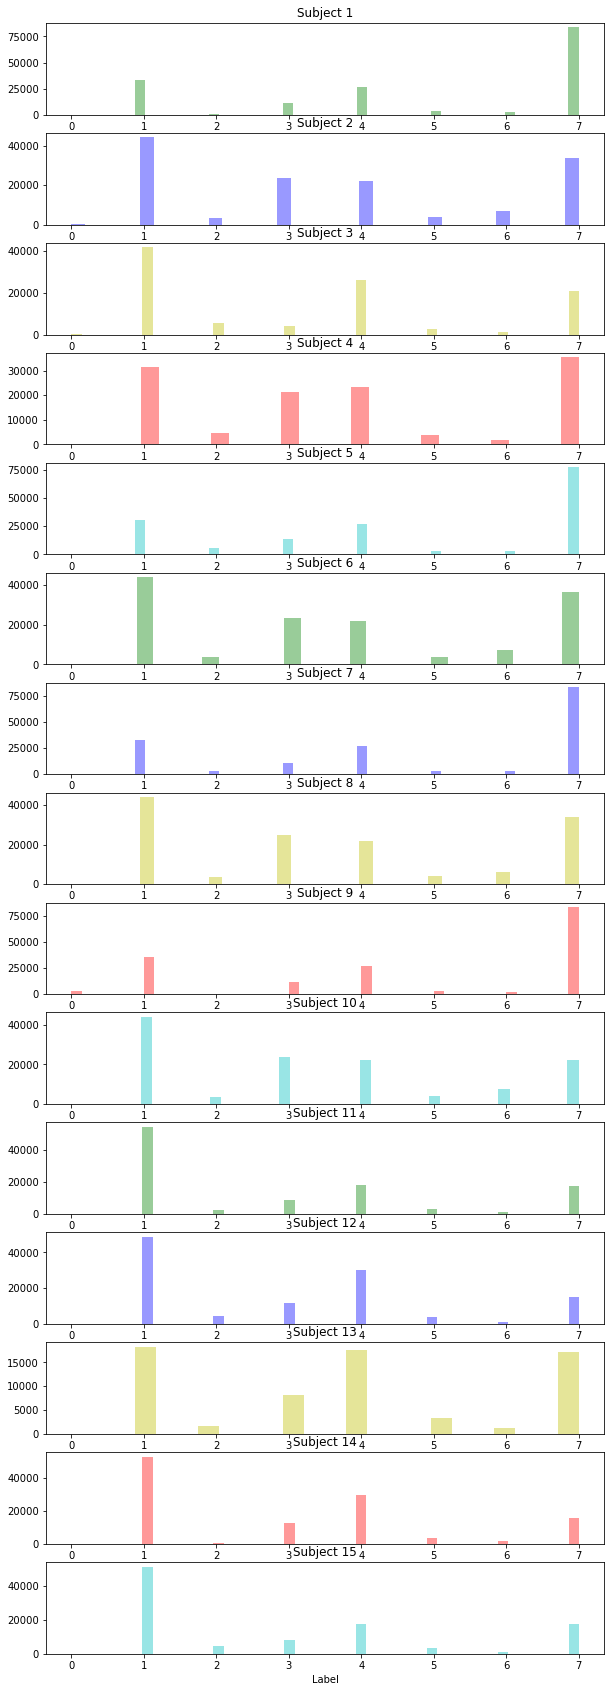

In [29]:
fig, axes = plt.subplots(nrows=15, ncols=1,figsize=(10, 30))

ax = sns.distplot(s1.Label, label = 'Subject', ax = axes[0], kde = False, color = 'g')
ax.set_title('Subject 1')

ax = sns.distplot(s2.Label, label = 'Subject', ax = axes[1], kde = False, color = 'b')
ax.set_title('Subject 2')

ax = sns.distplot(s3.Label, label = 'Subject', ax = axes[2], kde = False, color = 'y')
ax.set_title('Subject 3')

ax = sns.distplot(s4.Label, label = 'Subject', ax = axes[3], kde = False, color = 'r')
ax.set_title('Subject 4')

ax = sns.distplot(s5.Label, label = 'Subject', ax = axes[4], kde = False, color = 'c')
ax.set_title('Subject 5')

ax = sns.distplot(s6.Label, label = 'Subject', ax = axes[5], kde = False, color = 'g')
ax.set_title('Subject 6')

ax = sns.distplot(s7.Label, label = 'Subject', ax = axes[6], kde = False, color = 'b')
ax.set_title('Subject 7')

ax = sns.distplot(s8.Label, label = 'Subject', ax = axes[7], kde = False, color = 'y')
ax.set_title('Subject 8')

ax = sns.distplot(s9.Label, label = 'Subject', ax = axes[8], kde = False, color = 'r')
ax.set_title('Subject 9')

ax = sns.distplot(s10.Label, label = 'Subject', ax = axes[9], kde = False, color = 'c')
ax.set_title('Subject 10')

ax = sns.distplot(s11.Label, label = 'Subject', ax = axes[10], kde = False, color = 'g')
ax.set_title('Subject 11')

ax = sns.distplot(s12.Label, label = 'Subject', ax = axes[11], kde = False, color = 'b')
ax.set_title('Subject 12')

ax = sns.distplot(s13.Label, label = 'Subject', ax = axes[12], kde = False, color = 'y')
ax.set_title('Subject 13')

ax = sns.distplot(s14.Label, label = 'Subject', ax = axes[13], kde = False, color = 'r')
ax.set_title('Subject 14')

ax = sns.distplot(s15.Label, label = 'Subject', ax = axes[14], kde = False, color = 'c')
ax.set_title('Subject 15')

plt.show()

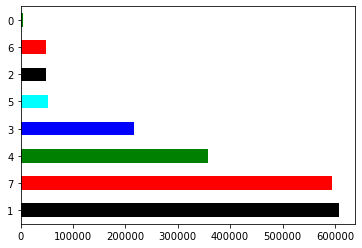

In [30]:
dn = dfsa['Label'].value_counts()
dn.plot(kind='barh', color=['black', 'red', 'green', 'blue', 'cyan'])

**This bar plot clearly defines that we may induct bias in model due to ineuality in data labels**

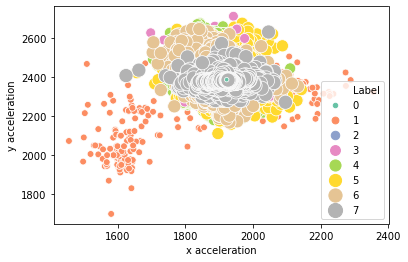

In [30]:
sns.scatterplot(x="x acceleration", y="y acceleration",
                     hue="Label", size="Label", palette="Set2",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=df1)

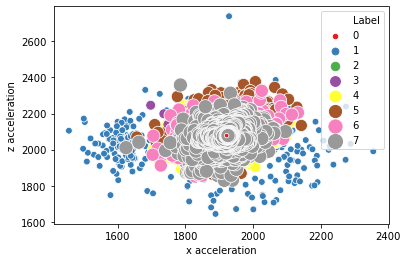

In [32]:
sns.scatterplot(x="x acceleration", y="z acceleration",
                     hue="Label", size="Label", palette="Set1",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=df1)

**Pair Plots**

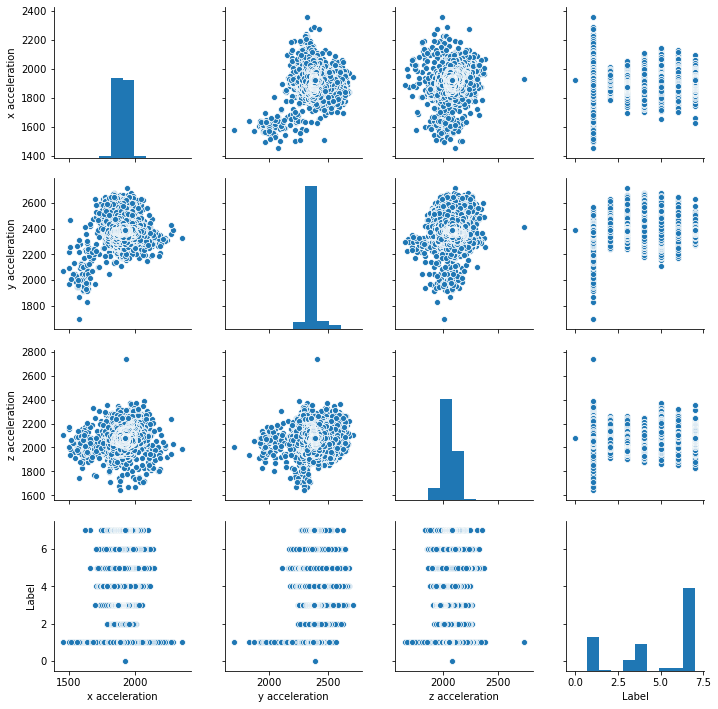

In [33]:
sns.pairplot(df1, diag_kind="hist")

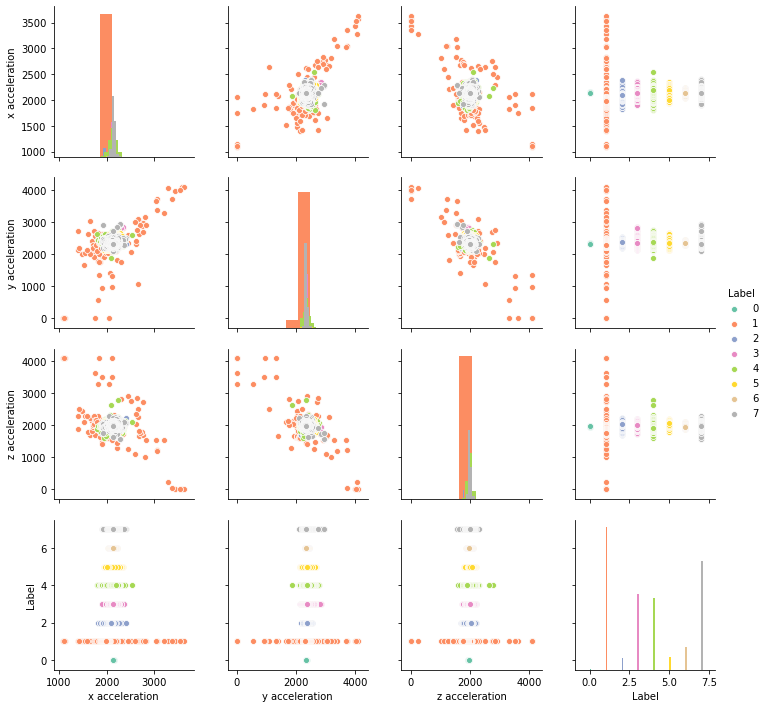

In [37]:
sns.pairplot(df2, diag_kind="hist", hue = 'Label', palette="Set2")

**Above scatter and pairplots cleary show how much our data is spread.**

#### **box blots to check outliers**

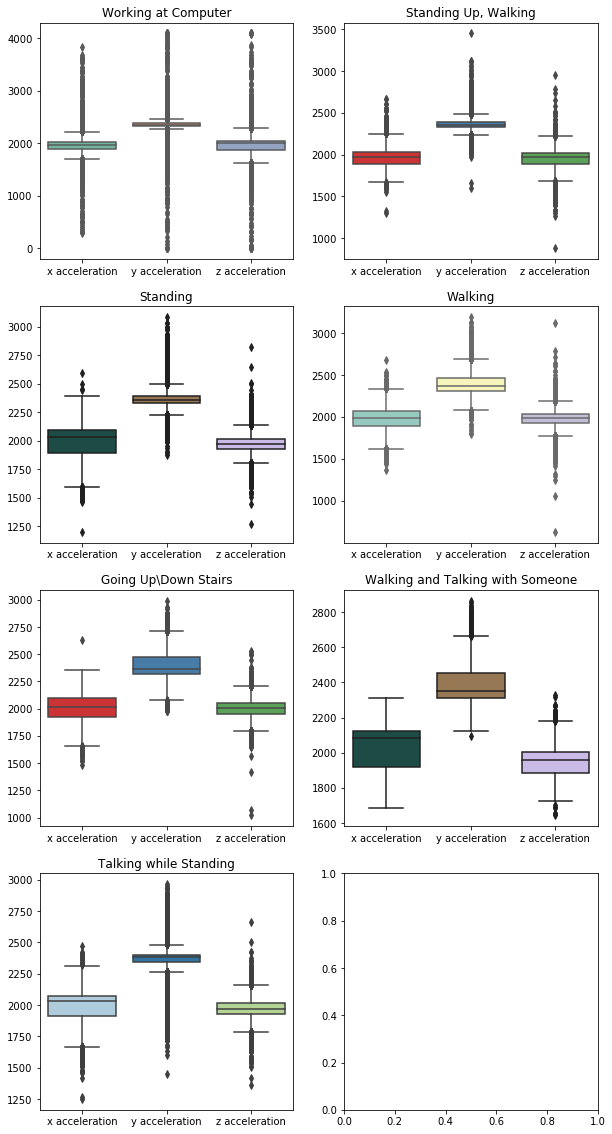

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(10, 20))

ax = sns.boxplot(data=L1, palette="Set2", ax = axes[0][0])
ax.set_title('Working at Computer')

ax = sns.boxplot(data=L2, palette="Set1", ax = axes[0][1])
ax.set_title('Standing Up, Walking')

ax = sns.boxplot(data=L3, palette="cubehelix", ax = axes[1][0])
ax.set_title('Standing')

ax = sns.boxplot(data=L4, palette="Set3", ax = axes[1][1])
ax.set_title('Walking')

ax = sns.boxplot(data=L5, palette="Set1", ax = axes[2][0])
ax.set_title('Going Up\Down Stairs')

ax = sns.boxplot(data=L6, palette="cubehelix", ax = axes[2][1])
ax.set_title('Walking and Talking with Someone')

ax = sns.boxplot(data=L7, palette="Paired", ax = axes[3][0])
ax.set_title('Talking while Standing')

plt.show()

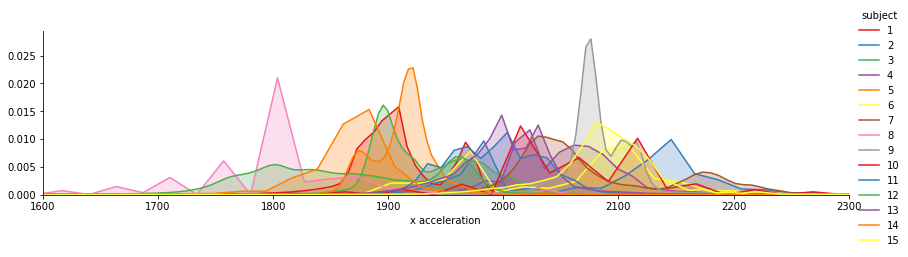

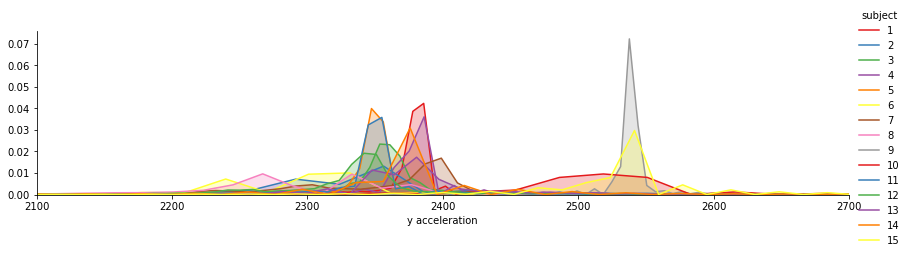

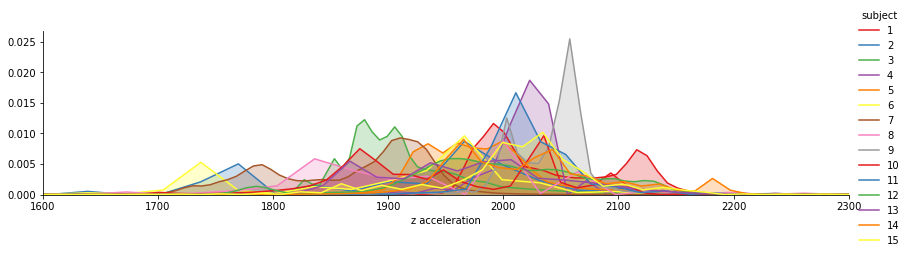

In [57]:
#Advance Vis

ax = sns.FacetGrid(dfsa, hue = 'subject', aspect=4, palette="Set1" )
ax.map(sns.kdeplot, 'x acceleration', shade= True )
ax.set(xlim=(1600 , 2300))
ax.add_legend()

ax1 = sns.FacetGrid(dfsa, hue = 'subject', aspect=4, palette="Set1" )
ax1.map(sns.kdeplot, 'y acceleration', shade= True )
ax1.set(xlim=(2100 , 2700))
ax1.add_legend()

ax2 = sns.FacetGrid(dfsa, hue = 'subject', aspect=4, palette="Set1" )
ax2.map(sns.kdeplot, 'z acceleration', shade= True )
ax2.set(xlim=(1600 , 2300))
ax2.add_legend()

plt.show()

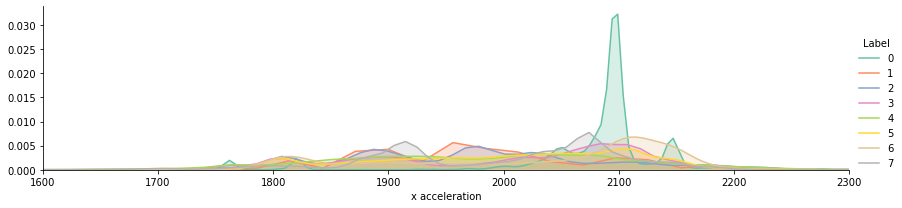

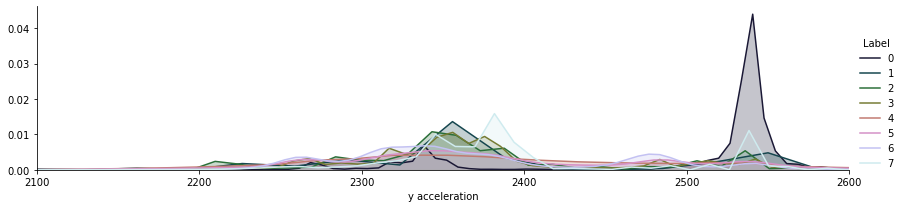

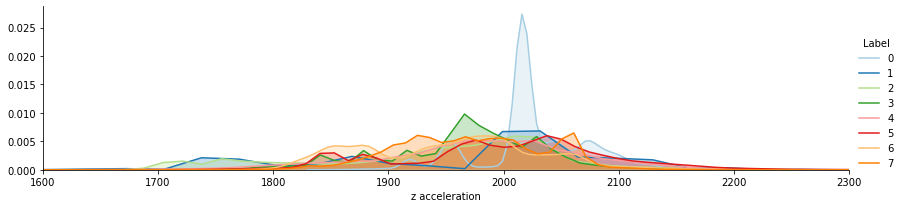

In [56]:
#Advance Vis
ax = sns.FacetGrid(dfsa, hue = 'Label', aspect=4, palette="Set2" )
ax.map(sns.kdeplot, 'x acceleration', shade= True )
ax.set(xlim=(1600 , 2300))
ax.add_legend()

ax1 = sns.FacetGrid(dfsa, hue = 'Label', aspect=4, palette="cubehelix" )
ax1.map(sns.kdeplot, 'y acceleration', shade= True )
ax1.set(xlim=(2100 , 2600))
ax1.add_legend()

ax2 = sns.FacetGrid(dfsa, hue = 'Label', aspect=4, palette="Paired" )
ax2.map(sns.kdeplot, 'z acceleration', shade= True )
ax2.set(xlim=(1600 , 2300))
ax2.add_legend()

#### **Lets visualize data in 3D**

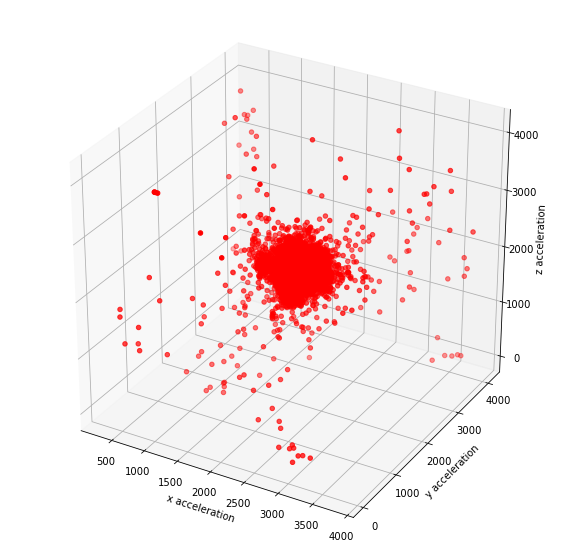

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(L1['x acceleration'],L1['y acceleration'],L1['z acceleration'], c='r', marker='o')

ax.set_xlabel('x acceleration')
ax.set_ylabel('y acceleration')
ax.set_zlabel('z acceleration')

plt.show()

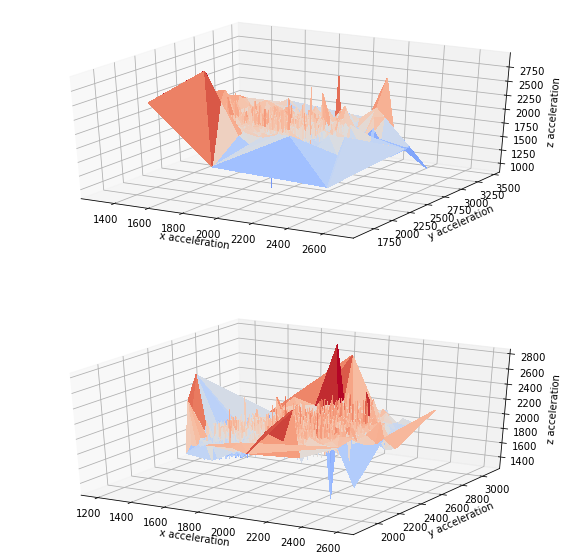

In [60]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(211, projection='3d')

ax.plot_trisurf(L2['x acceleration'],L2['y acceleration'],L2['z acceleration'],
                cmap='coolwarm',linewidth=0, antialiased=False)

ax.set_xlabel('x acceleration')
ax.set_ylabel('y acceleration')
ax.set_zlabel('z acceleration')


ax = fig.add_subplot(212, projection='3d')

ax.plot_trisurf(L3['x acceleration'],L3['y acceleration'],L3['z acceleration'], 
                cmap='coolwarm',linewidth=0, antialiased=False)

ax.set_xlabel('x acceleration')
ax.set_ylabel('y acceleration')
ax.set_zlabel('z acceleration')

plt.show()

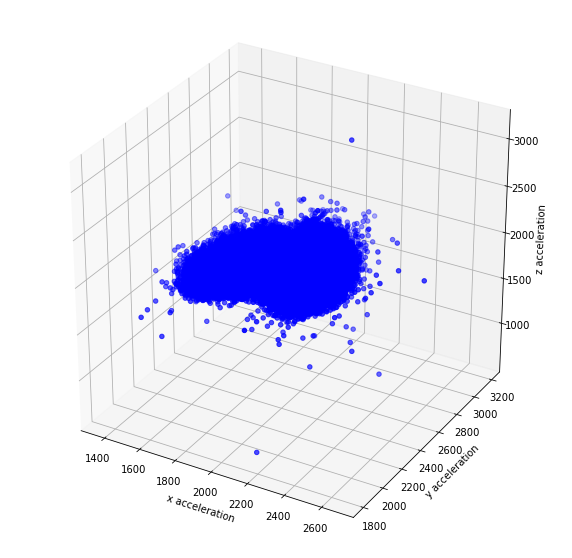

In [29]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(L4['x acceleration'],L4['y acceleration'],L4['z acceleration'], c='b', marker='o')

ax.set_xlabel('x acceleration')
ax.set_ylabel('y acceleration')
ax.set_zlabel('z acceleration')

plt.show()

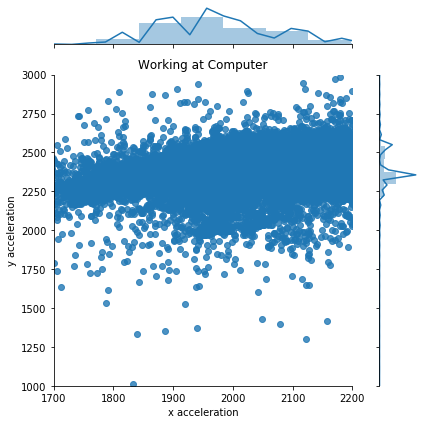

In [38]:
ax = sns.jointplot(L1['x acceleration'],L1['y acceleration'], 
                   kind="reg", xlim=(1700,2200), ylim=(1000,3000))
plt.title('Working at Computer')
plt.tight_layout()
plt.show()

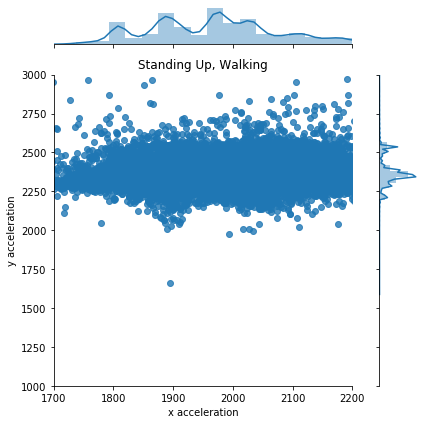

In [39]:
ax1 = sns.jointplot(L2['x acceleration'],L2['y acceleration'], kind="reg", xlim=(1700,2200), ylim=(1000,3000))
plt.title('Standing Up, Walking')
plt.tight_layout()
plt.show()

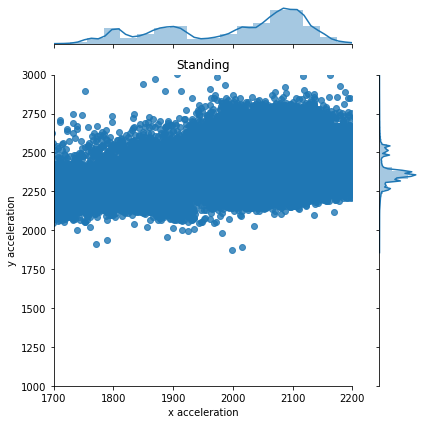

In [40]:
ax2 = sns.jointplot(L3['x acceleration'],L3['y acceleration'], kind="reg", xlim=(1700,2200), ylim=(1000,3000))
plt.title('Standing')
plt.tight_layout()
plt.show()

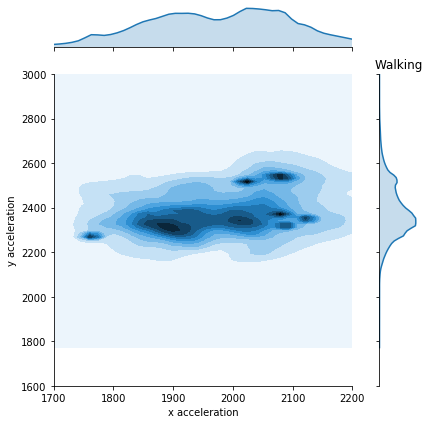

In [45]:
ax = sns.jointplot(L4['x acceleration'],L4['y acceleration'], kind="kde", 
                   xlim=(1700,2200), ylim=(1600,3000))
plt.title('Walking')
plt.tight_layout()
plt.show()

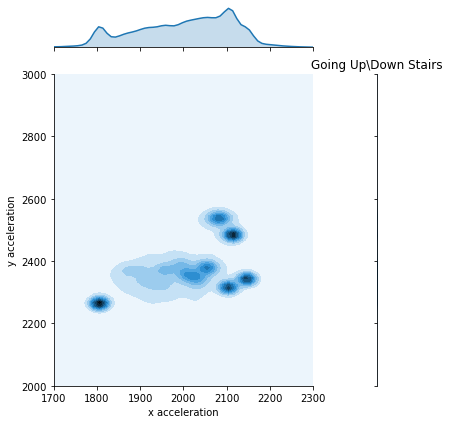

In [51]:
ax = sns.jointplot(L5['x acceleration'],L5['y acceleration'], kind="kde", 
                   xlim=(1700,2300), ylim=(2000,3000))
plt.title('Going Up\Down Stairs')
plt.tight_layout()
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



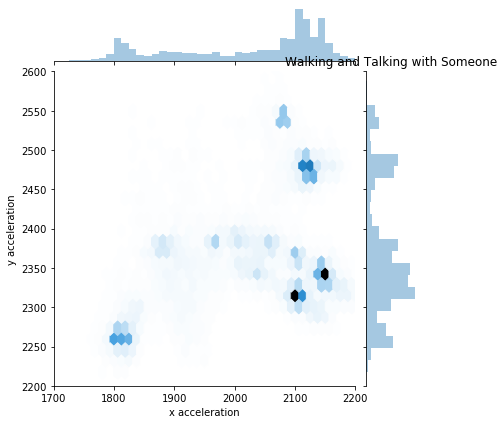

In [54]:
sns.jointplot(L6['x acceleration'],L6['y acceleration'], kind="hex",
              xlim=(1700,2200), ylim=(2200,2600))
plt.title('Walking and Talking with Someone')
plt.tight_layout()
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



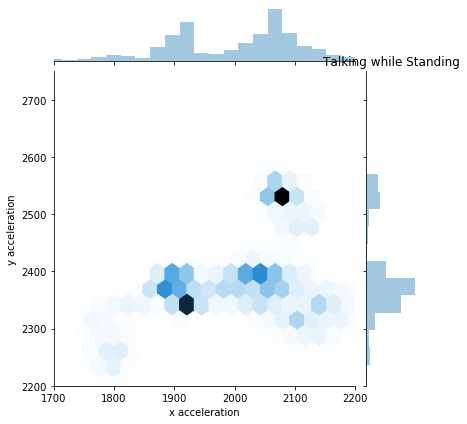

In [56]:
sns.jointplot(L7['x acceleration'],L7['y acceleration'], kind="hex",
              xlim=(1700,2200), ylim=(2200,2750))
plt.title('Talking while Standing')
plt.tight_layout()
plt.show()

### Check Correlation

In [11]:
#creating new features
dfsa['Working at Computer'] = dfsa['Label']==1
dfsa['Standing Up, Walking'] = dfsa['Label']==2
dfsa['Standing'] = dfsa['Label']==3
dfsa['Walking'] = dfsa['Label']==4
dfsa['Going Up\Down Stairs'] = dfsa['Label']==5
dfsa['Walking and Talking with Someone'] = dfsa['Label']==6
dfsa['Talking while Standing'] = dfsa['Label']==7

In [12]:
transform = ['Working at Computer', 'Standing Up, Walking', 'Standing', 'Walking', 'Going Up\Down Stairs',
             'Walking and Talking with Someone', 'Talking while Standing']

In [13]:
from sklearn import preprocessing

In [14]:
dfsa[transform] = dfsa[transform].apply(preprocessing.LabelEncoder().fit_transform)

In [15]:
dfsa.tail()

,x acceleration,y acceleration,z acceleration,Label,subject,Working at Computer,"Standing Up, Walking",Standing,Walking,Going Up\Down Stairs,Walking and Talking with Someone,Talking while Standing
103500.00,2043,2539,1990,7,15,0,0,0,0,0,0,1
103500.00,2036,2508,1976,7,15,0,0,0,0,0,0,1
103500.00,2025,2520,1991,7,15,0,0,0,0,0,0,1
103500.00,2009,2546,2007,7,15,0,0,0,0,0,0,1
103500.00,1999,2532,1996,0,15,0,0,0,0,0,0,0


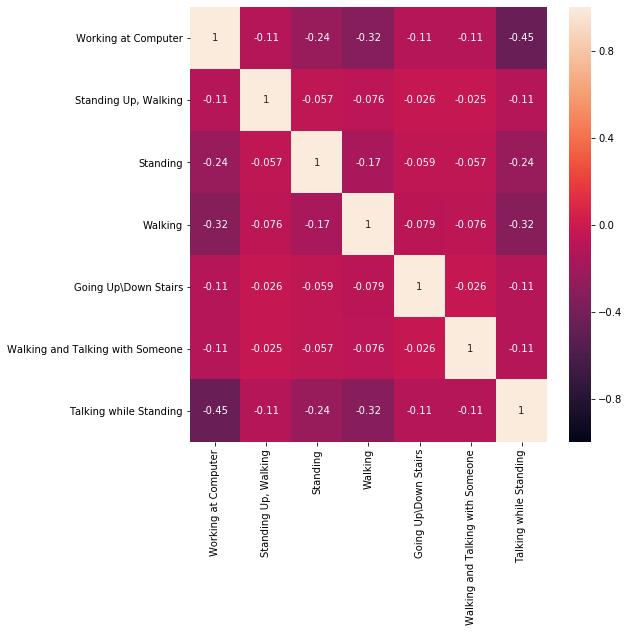

In [25]:
plt.figure(figsize = (8,8))
ax = sns.heatmap(dfsa[transform].corr(),annot=True,vmin=-1,vmax=1)
plt.show()